In [2]:
import numpy as np
from scipy.sparse import diags
import matplotlib.pyplot as plt
import scipy 

# Problema 3

In [3]:

def Q(cons_lamda,cons_mu,N):
    N = N
    def q(i,j):
        if j == i+1:
            return cons_lamda*i*(N-i)/N
        elif j == i-1:
            return cons_mu*i
        else: 
            return 0 

    def lambda_i(i):
        if i == N:
            return q(i,i-1)
        else: 
            return q(i,i+1) + q(i,i-1)
    
    vec_sig =  [0]+[q(i,i+1) for i in range(1,N)]
    vec_ant = [q(i,i-1) for i in range(1,N+1)]
    lambdas = [lambda_i(i) for i in range(0,N+1)]
    diagonals = [vec_sig,lambdas,vec_ant]
    return  diags(diagonals, [1,0,-1 ]).toarray()

In [4]:

def Simul(inicio,Q,N,n = np.inf):
    actual = inicio
    tiempos = [0] 
    infectados = [actual]
    i = 0
    while True and n > i:               
        if actual == N:
            t_i = np.random.exponential(1/Q[actual,actual])
            tiempos.append(t_i+tiempos[-1])            
            actual = actual-1
        else:    
            #P_sig = Q[actual,actual+1]/Q[actual,actual]
            P_ant = Q[actual,actual-1]/Q[actual,actual]
            t_i = np.random.exponential(1/Q[actual,actual])
            tiempos.append(t_i+tiempos[-1])
            
            if np.random.rand() <=  P_ant:
                actual = actual-1
            else: 
                actual = actual+1
        
        infectados.append(actual)
        if actual == 0:
            break
        i =+ 1
    return tiempos,infectados

In [5]:
N = 5
Q_matrix = Q(cons_lamda=2,cons_mu=1,N=N)

# Problema 4 y 5

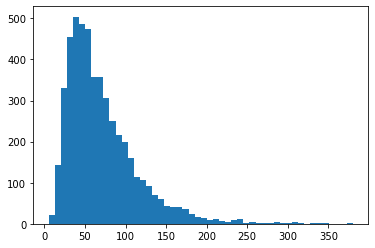

70.45997156497755

In [6]:
N = 100
Q_matrix = Q(cons_lamda=0.08,cons_mu=0.1,N=N)
extin = []
tiempos = []
for i in range(5000):
    tiempos,infec = Simul(inicio=10,Q=Q_matrix,N=N)
    extin.append(tiempos[-1])

plt.hist(extin,bins=50)
plt.show()

np.mean(extin)

In [1]:
from scipy.stats import gamma
res= gamma.fit(extin)

NameError: name 'extin' is not defined